### Capstone Two: Modelling

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_validate
from pandas import get_dummies
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,plot_roc_curve,plot_precision_recall_curve
import scipy.stats as stats
import pickle
import warnings
warnings.filterwarnings('ignore')

We start by importing previsouly processed dataframe:

In [2]:
df = pd.read_csv('pp_df.csv')

In [3]:
df.head()

,age group,eligible,salary,targeted,default,balance,housing,loan,day,campaign,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,5,1,100000,1,0,2143,1,0,5,1,...,0,0,0,1,0,0,0,0,0,1
1,4,1,60000,1,0,29,1,0,5,1,...,0,0,0,1,0,0,0,0,0,1
2,3,1,120000,1,0,2,1,1,5,1,...,0,0,0,1,0,0,0,0,0,1
3,4,1,20000,0,0,1506,1,0,5,1,...,0,0,0,1,0,0,0,0,0,1
4,3,1,0,0,0,1,0,0,5,1,...,0,0,0,1,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age group            45211 non-null  int64
 1   eligible             45211 non-null  int64
 2   salary               45211 non-null  int64
 3   targeted             45211 non-null  int64
 4   default              45211 non-null  int64
 5   balance              45211 non-null  int64
 6   housing              45211 non-null  int64
 7   loan                 45211 non-null  int64
 8   day                  45211 non-null  int64
 9   campaign             45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int64
 12  job_blue-collar      45211 non-null  int64
 13  job_entrepreneur     45211 non-null  int64
 14  job_housemaid        45211 non-null  int64
 15  job_management       45211 non-null  int64
 16  job_retired          4

In [5]:
df.columns

Index(['age group', 'eligible', 'salary', 'targeted', 'default', 'balance',
       'housing', 'loan', 'day', 'campaign', 'previous', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [6]:
important_features = df[['age group', 'salary', 'balance', 'housing', 'day','campaign']]

## Load Model

In [7]:
# Load the Model back from file
with open("Pickle_RF_Model.pkl", 'rb') as file:  
     Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt',
                                        n_estimators=297))])

In [8]:
type(Pickled_LR_Model)

sklearn.pipeline.Pipeline

### Load data

In [9]:
X = pd.read_csv('X_test.csv')

In [10]:
y = pd.read_csv('y_test.csv')


In [11]:
y_true = pd.read_csv('y_train.csv')

### Test Data

In [12]:
Pickled_LR_Model.fit(X,np.ravel(y))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt',
                                        n_estimators=297))])

In [13]:
cv_results = cross_validate(Pickled_LR_Model, X, y, scoring='accuracy', cv=5, n_jobs=-1)
cv_results = pd.DataFrame(cv_results)

In [14]:
cv_results['test_score'].mean()

0.8895609416912127

In [15]:
# Calculate the Score 
score = Pickled_LR_Model.score(X, y)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  



Test score: 100.00 %


## Important Features

The most important features we found in the previous notebook are:
1. Balance
2. Day (of the call)
3. Age group
4. Campaign
5. Salary
6. Previous
7. Housing

In [16]:
y = df['y']
y_yes = y[df['y'] == 1]
y_yes.count()


5289

In [17]:
print("There is: ", round(len(y_yes) / len(y) * 100, 2), "% of positive answers overall.")


There is:  11.7 % of positive answers overall.


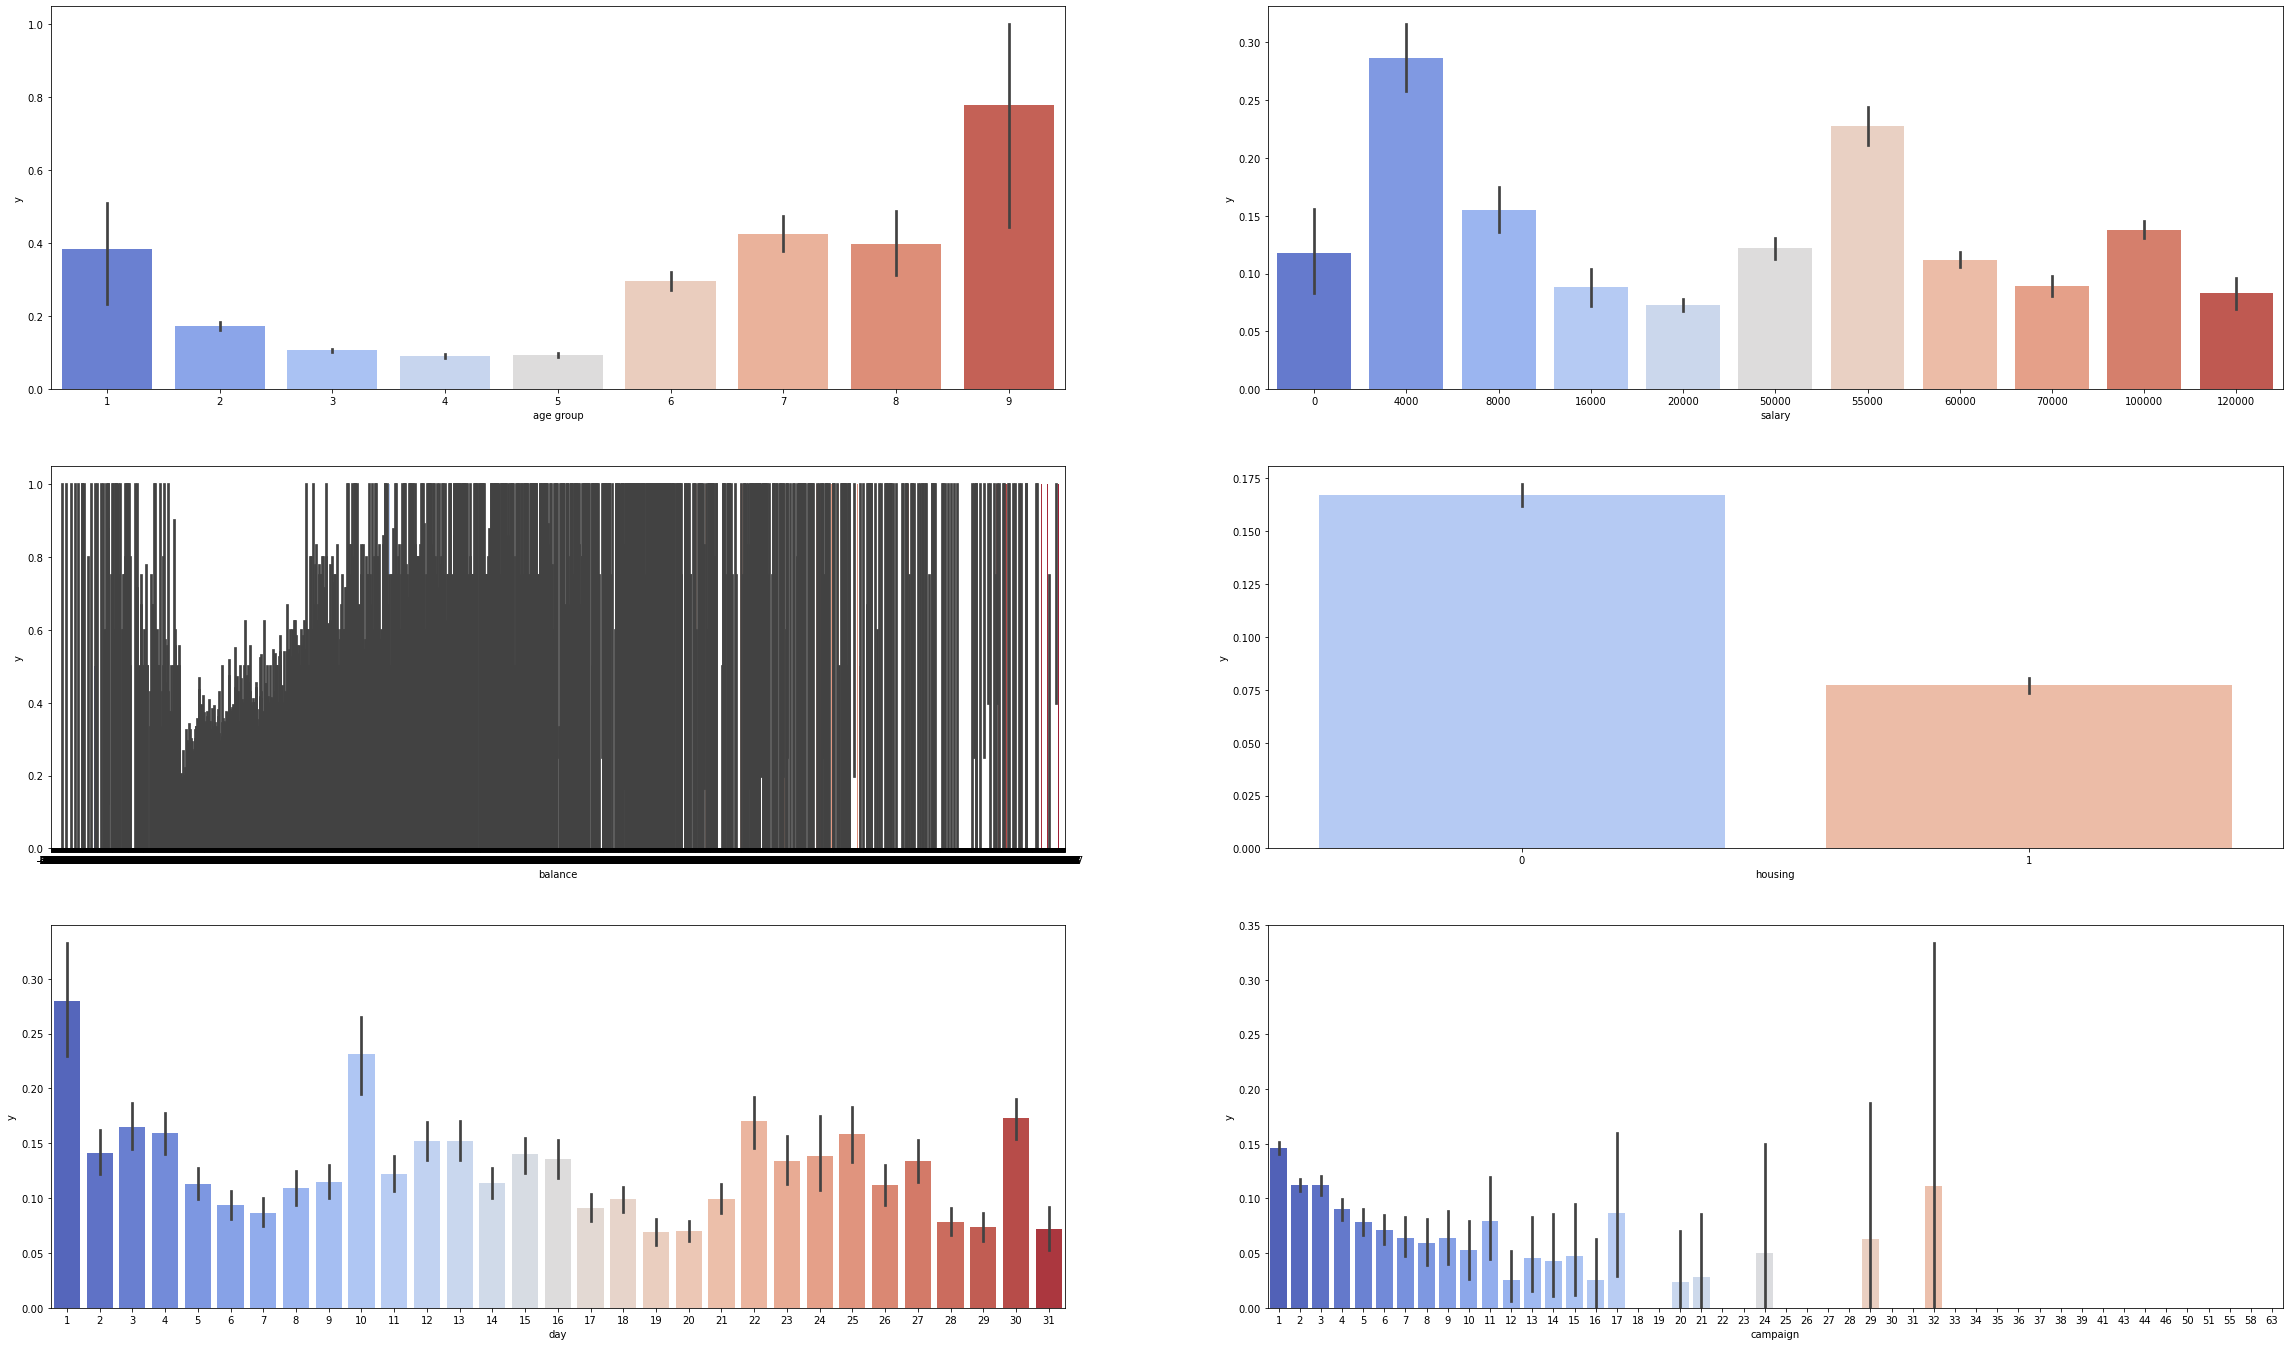

/Users/majapedigo/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/majapedigo/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/majapedigo/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/majapedigo/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarn

In [18]:
#barplot to show target distribution with respect important features
plt.figure(figsize=(40,100))
plotnumber =1
for feature in important_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.barplot(x=df[feature], y="y" , data=df, palette='coolwarm', color='slateblue')
    plt.xlabel(feature)
    plotnumber+=1
plt.show()


From the above comparison of distributions of our target and most relevant features, we can conclude that:
- older clients will subscribe more likely
- income of 40-50k is more likely to lead to subscription
- people who don't already have a mortgage would rather subscribe
- 1st and 10th day in a month of contact has the greatest positive impact
- contacting more than just a few times leads to negative impact to subscription
- higher balance means more chance to subscribe